In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image

In [96]:
imges = 'train_data/DataTrain374.png'

test_images = cv2.imread(imges)

height, width, channels = test_images.shape
print(height, width, channels)
plt.figure(figsize=(20,30))
plt.imshow(test_images, cmap='gray')
plt.axis('on')

plt.show()

114 380 3


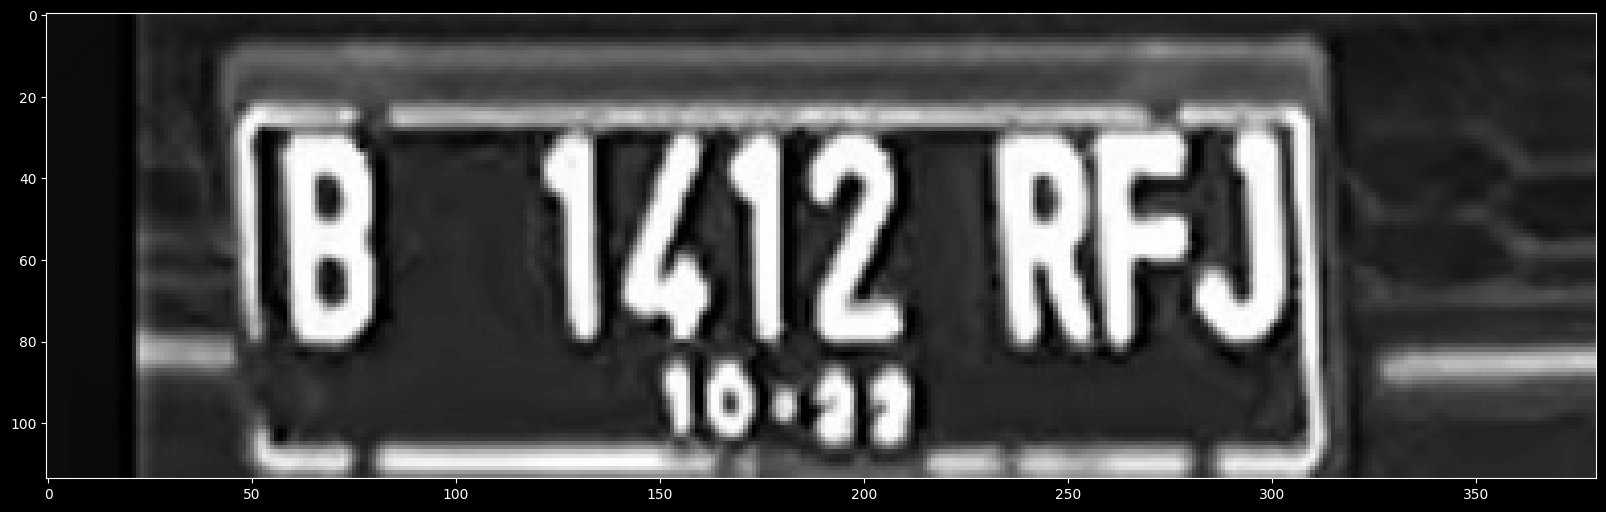

In [97]:
test_images = cv2.imread(imges, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,30))
plt.imshow(test_images, cmap='gray')
plt.axis('on')
plt.show()

scale up the image using 3x


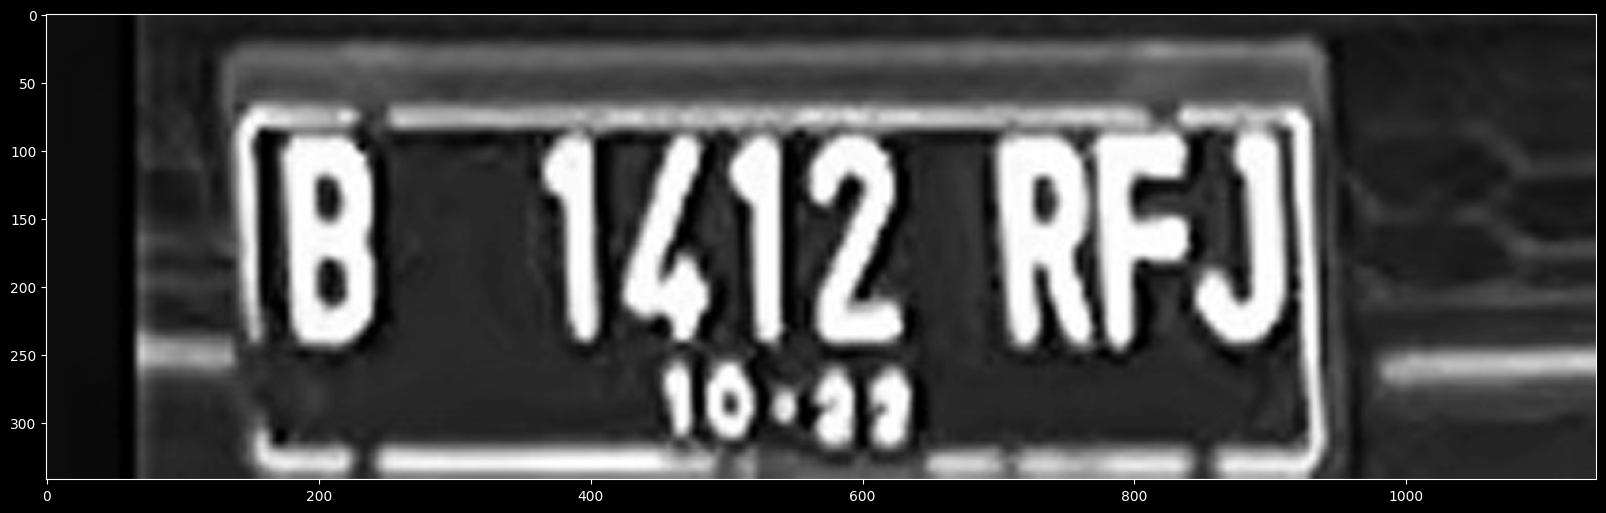

In [98]:
# scale up the image when it is too small, using best method for word recognition
if (height < 350 or width < 350) and (height > 150 or width > 150):
    print("scale up the image using 3x")
    test_images = cv2.resize(test_images, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    plt.figure(figsize=(20,30))
    plt.imshow(test_images, cmap='gray')
    plt.axis('on')
    plt.show()

elif (height < 150 or width < 150):
    print("scale up the image using 8x")
    test_images = cv2.resize(test_images, None, fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
    plt.figure(figsize=(20,30))
    plt.imshow(test_images, cmap='gray')
    plt.axis('on')
    plt.show()

else:
    plt.figure(figsize=(20,30))
    plt.imshow(test_images, cmap='gray')
    plt.axis('on')
    plt.show()

# # scale up image using deep learning super resolution
# def deeplearning_super_resolution(image):
#     import cv2
#     import numpy as np
#     import matplotlib.pyplot as plt
#     import matplotlib.image as mpimg
#     import os
#     from PIL import Image
#     import tensorflow as tf
#     from ISR.models import RDN, RRDN

#     rdn = RDN(weights='psnr-small')
#     # rrdn = RRDN(weights='gans')

#     # img = mpimg.imread('test_images/1.png')
#     # img = cv2.imread('test_images/1.png')
#     # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = image
#     sr_img = rdn.predict(img)
#     # sr_img = rrdn.predict(img)

#     # plt.figure(figsize=(20,30))
#     # plt.imshow(sr_img)
#     # plt.axis('on')
#     # plt.show()

#     return sr_img

# test_images = deeplearning_super_resolution(test_images)

# plt.figure(figsize=(20,30))
# plt.imshow(test_images, cmap='gray')
# plt.axis('on')
# plt.show()

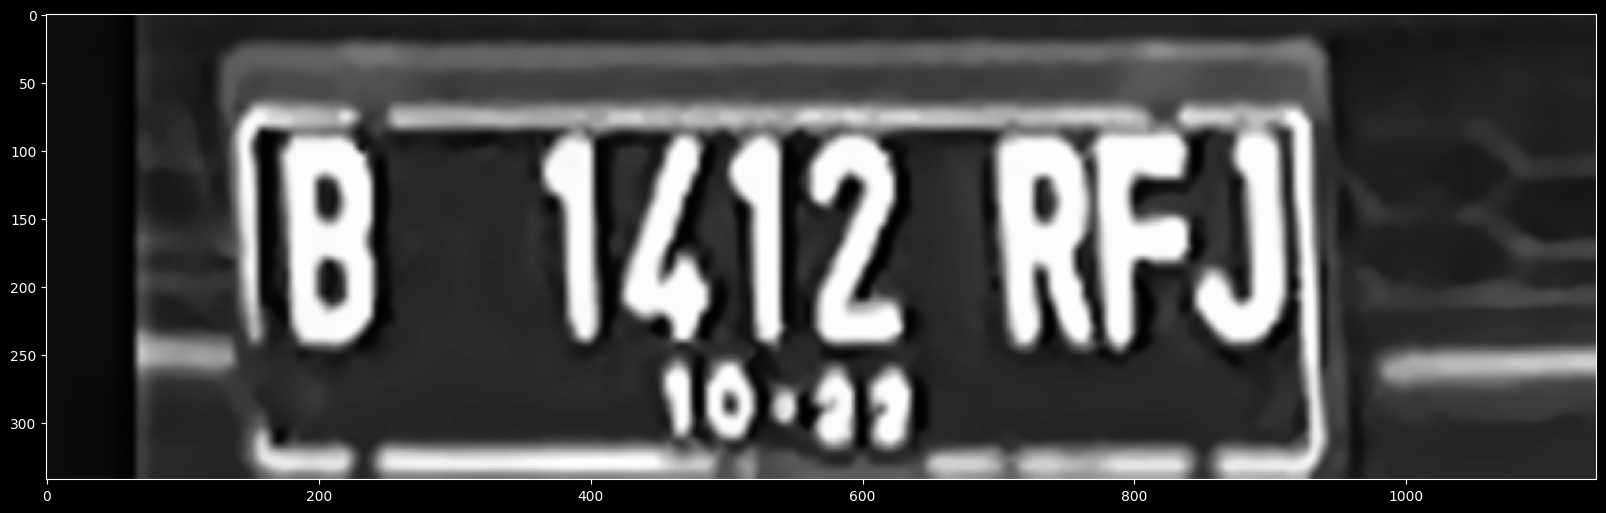

In [99]:
# remove color noise
test_images = cv2.fastNlMeansDenoising(test_images, None, 10, 7, 21)
plt.figure(figsize=(20,30))
plt.imshow(test_images, cmap='gray')
plt.axis('on')
plt.show() 

angle is 0.0


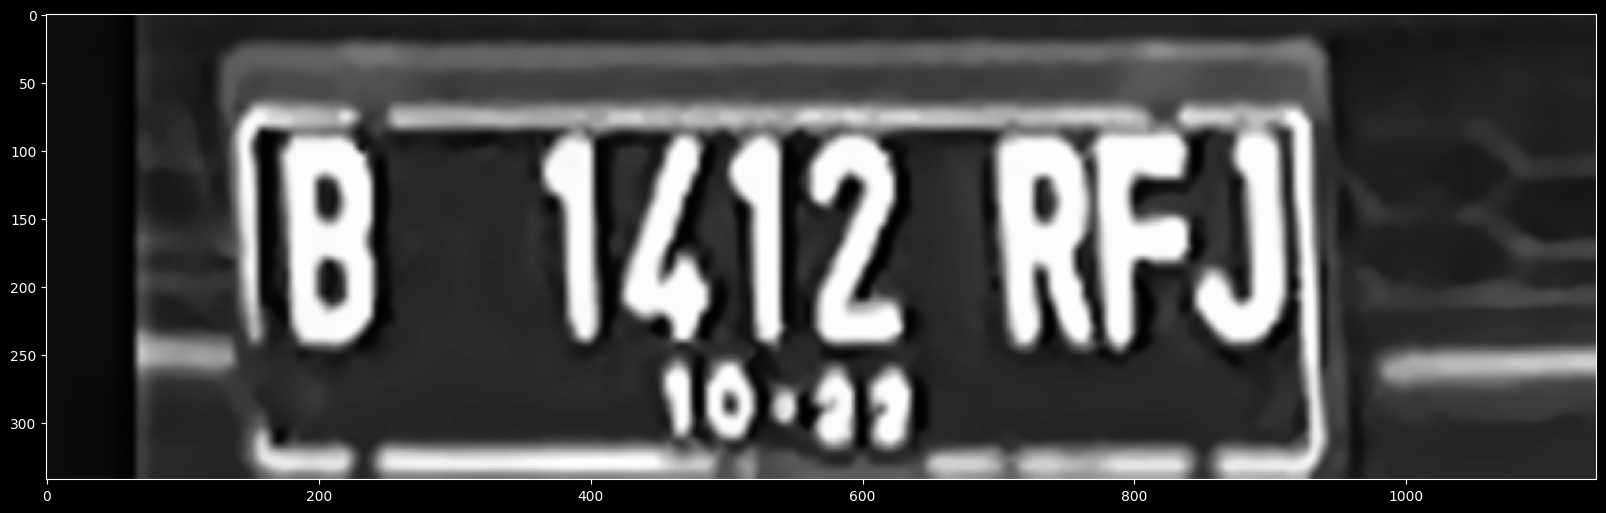

In [100]:
from deskew import determine_skew
from scipy import ndimage

try :
    # determine skew angle of the image
    angle = determine_skew(test_images)
    print("angle is {}".format(angle))

    # rotate the image to deskew it
    test_images = ndimage.rotate(test_images, angle, mode='constant', cval=255)
    plt.figure(figsize=(20,30))
    plt.imshow(test_images, cmap='gray')
    plt.axis('on')
    plt.show()

except:
    print("no skew angle detected")
    plt.figure(figsize=(20,30))
    plt.imshow(test_images, cmap='gray')
    plt.axis('on')
    plt.show()

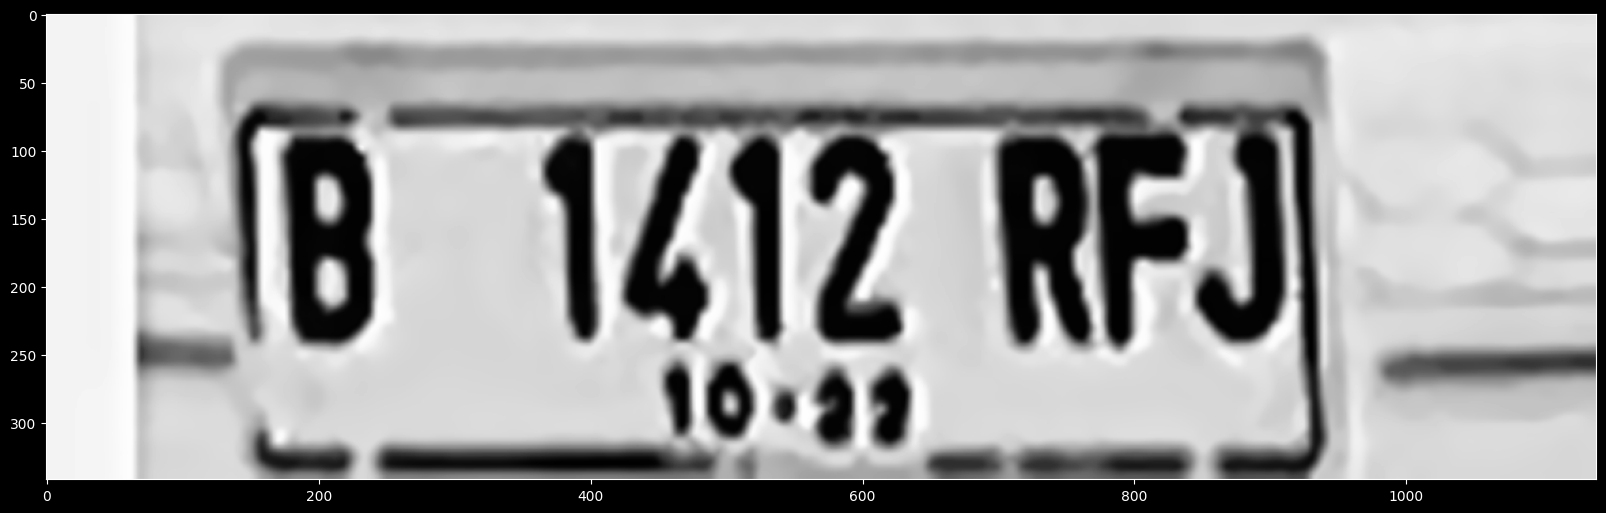

In [101]:
# # calculate are the plate is on white background or black background
# # if the plate is on white background, do nothing
# # if the plate is on black background, invert the image

test_images = cv2.bitwise_not(test_images)

plt.figure(figsize=(20,30))
plt.imshow(test_images, cmap='gray')
plt.axis('on')
plt.show()

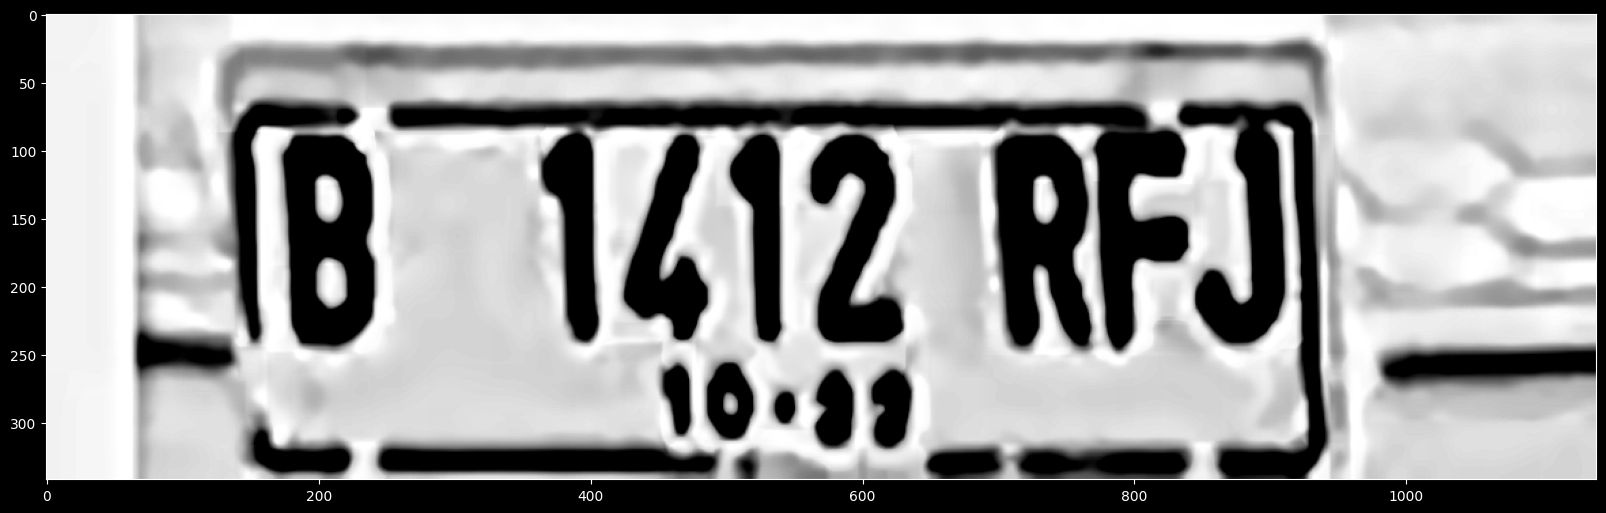

In [102]:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))

imgTopHat = cv2.morphologyEx(test_images, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(test_images, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(test_images, imgTopHat)
test_images = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plt.figure(figsize=(20,30))
plt.imshow(test_images, cmap='gray')
plt.axis('on')
plt.show()

In [103]:
kernel_sharpening = np.array([[-1,-1,-1],
                                [-1, 9,-1],
                                [-1,-1,-1]])
test_images = cv2.filter2D(test_images, -1, kernel_sharpening)

plt.figure(figsize=(20,30))
plt.imshow(test_images, cmap='gray')
plt.axis('on')
plt.show()

In [104]:
test_images = cv2.bilateralFilter(test_images, 11, 17, 17)

plt.figure(figsize=(20,30))
plt.imshow(test_images, cmap='gray')
plt.axis('on')
plt.show()

In [105]:
# # clean the noise
# test_images = cv2.fastNlMeansDenoising(test_images, None, 10, 7, 21)

# plt.figure(figsize=(20,30))
# plt.imshow(test_images, cmap='gray')
# plt.axis('on')
# plt.show()

In [106]:
#sharpen the edges
test_images = cv2.GaussianBlur(test_images, (5, 5), 0)
test_images = cv2.addWeighted(test_images, 1.5, test_images, -0.5, 0)
# # hilangkan motion blur dengan menggunakan fft
# fft = np.fft.fft2(test_images)
# fshift = np.fft.fftshift(fft)
# magnitude_spectrum = 20*np.log(np.abs(fshift))
# test_images = np.fft.ifft2(np.fft.ifftshift(fshift))
# test_images = np.abs(test_images)
# test_images = test_images.astype(np.uint8)
# test_images = cv2.normalize(test_images, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.figure(figsize=(20,30))
plt.imshow(test_images, cmap='gray')
plt.axis('on')
plt.show()

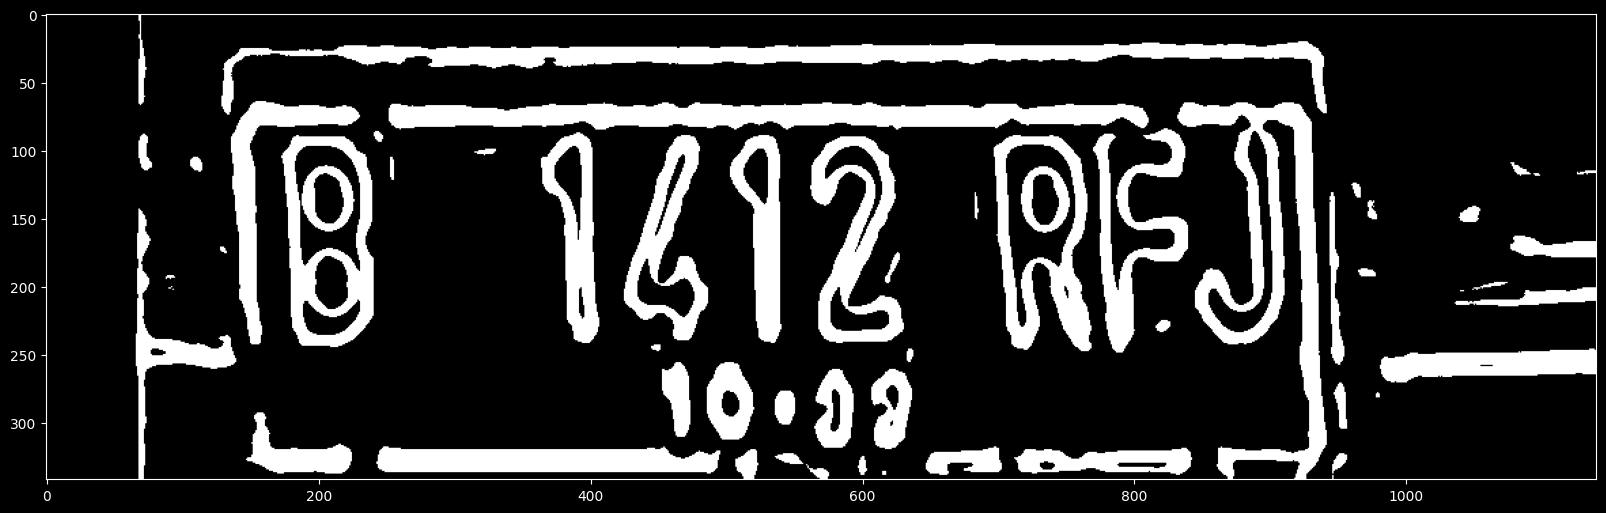

In [107]:
img_blur = cv2.GaussianBlur(test_images, (5,5), 0)
img_tresh = cv2.adaptiveThreshold(
    img_blur, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV, 
    blockSize=39, 
    C=21
    )
plt.figure(figsize=(20,30))
plt.imshow(img_tresh, cmap='gray')
plt.axis('on')
plt.show()

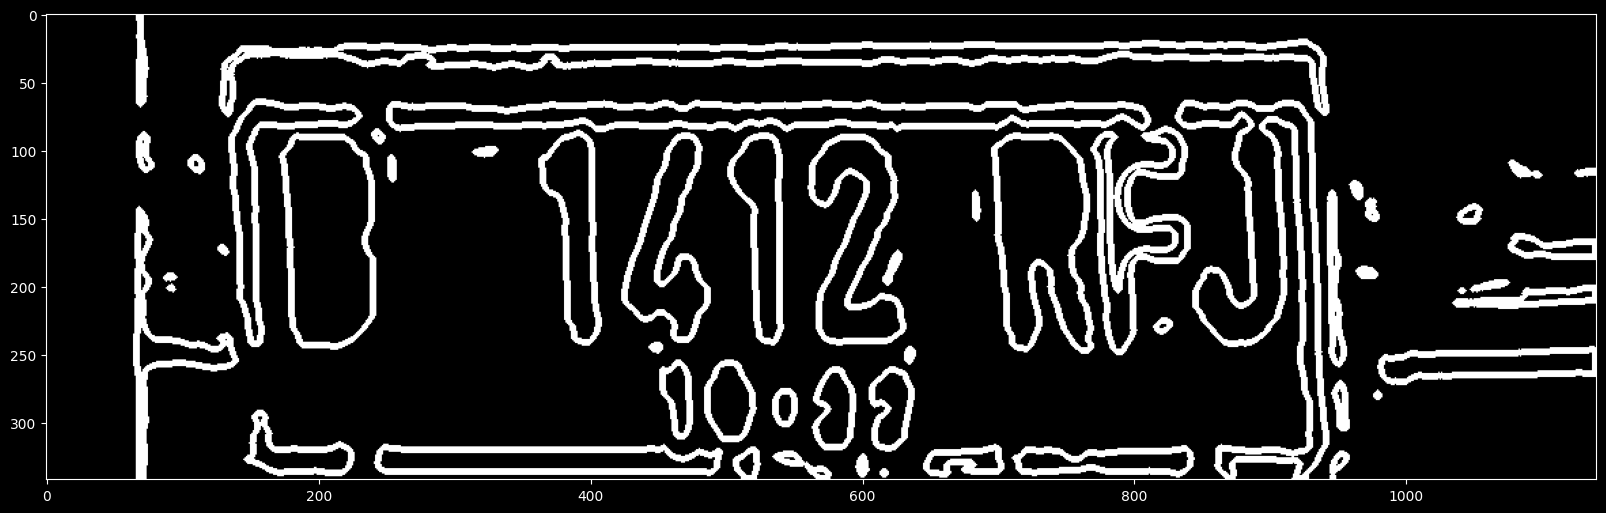

In [108]:
# add contours
contours, _ = cv2.findContours(img_tresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = np.zeros(test_images.shape)
cv2.drawContours(img_contours, contours, -1, (255,255,255), 3, cv2.LINE_AA, None, 1)

plt.figure(figsize=(20,30))
plt.imshow(img_contours, cmap='gray')
plt.axis('on')
plt.show()

In [109]:
temp_result = np.zeros(test_images.shape, dtype=np.uint8)
contours_dict = []

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(temp_result, (x,y), (x+w, y+h), (255,255,255), thickness=2)
    contours_dict.append({
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + w/2,
        'cy': y + h/2
        })

plt.figure(figsize=(20,30))
plt.imshow(temp_result, cmap='gray')
plt.axis('on')
plt.show()

In [110]:
MIN_AREA = 100
MIN_WIDTH, MIN_HEIGHT = 1, 9
MIN_RATIO, MAX_RATIO = 0.1, 5.0

possible_contours = []
cnt = 0

for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)

temp_result = np.zeros(test_images.shape, dtype=np.uint8)

for d in possible_contours:
    # draw rectangle
    temp_result = cv2.rectangle(temp_result, (d['x'],d['y']), (d['x']+d['w'],d['y']+d['h']), (255,255,255), thickness=2)

plt.figure(figsize=(20,30))
plt.imshow(temp_result, cmap='gray')
plt.axis('on')
plt.show()

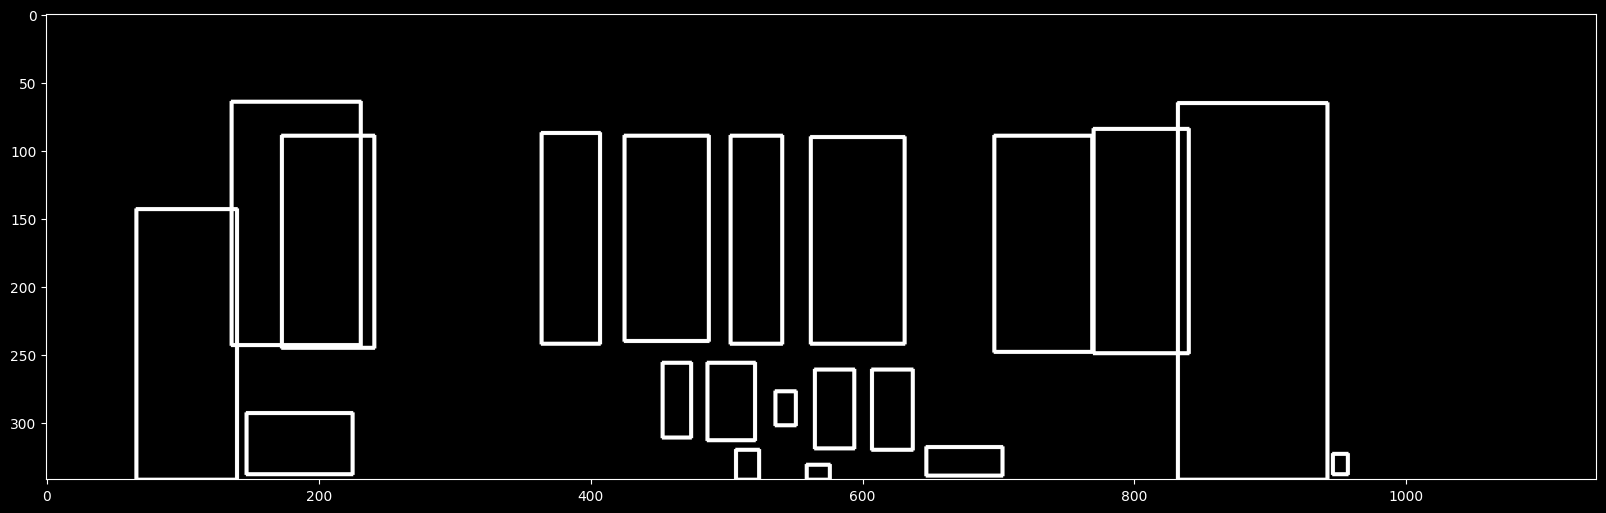

In [111]:
MAX_DIAG_MULTIPLYER = 8 # 5
MAX_ANGLE_DIFF = 15.0 # 12.0
MAX_AREA_DIFF = 0.9 # 0.5
MAX_WIDTH_DIFF = 2.5 # 0.8
MAX_HEIGHT_DIFF = 0.6 # 0.2
MIN_N_MATCHED = 4 # 3

def find_chars(contour_list):
    matched_result_idx = []
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'],d1['cy']]) - np.array([d2['cx'],d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)

        # recursive
        recursive_contour_list = find_chars(unmatched_contour)

        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break
    
    return matched_result_idx

result_idx = find_chars(possible_contours)

matched_result = []

for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

temp_result = np.zeros(test_images.shape, dtype=np.uint8)

for r in matched_result:
    for d in r:
        # draw rectangle
        temp_result = cv2.rectangle(temp_result, (d['x'],d['y']), (d['x']+d['w'],d['y']+d['h']), (255,255,255), thickness=2)

plt.figure(figsize=(20,30))
plt.imshow(temp_result, cmap='gray')
plt.axis('on')
plt.show()

In [112]:
# crop and keep only the plate
mask = np.zeros(test_images.shape, dtype=np.uint8)
new_contours = []

for r in matched_result:
    for d in r:
        new_contours.append(d)

for d in new_contours:
    # draw rectangle
    mask = cv2.rectangle(mask, (d['x'],d['y']), (d['x']+d['w'],d['y']+d['h']), (255,255,255), thickness=-1)

# if the plate is expected not detected, use the default value
if len(new_contours) == 0:
    plt.figure(figsize=(20,30))
    plt.imshow(test_images, cmap='gray')
    plt.axis('on')
    plt.show()

else :
    plt.figure(figsize=(20,30))
    plt.imshow(mask, cmap='gray')
    plt.axis('on')
    plt.show()

    # keep only the plate
    copy_img = np.copy(test_images)
    copy_img[mask == 0] = 0

    plt.figure(figsize=(20,30))
    plt.imshow(copy_img, cmap='gray')
    plt.axis('on')
    plt.show()
    # crop the plate based on the top left and bottom right corner of the plate using the real image
    # get the top left and bottom right corner of the plate
    x, y, w, h = cv2.boundingRect(mask)
    cropped_img = test_images[y:y+h, x:x+w]

    test_images = cropped_img

    plt.figure(figsize=(20,30))
    plt.imshow(test_images, cmap='gray')
    plt.axis('on')
    plt.show()

white


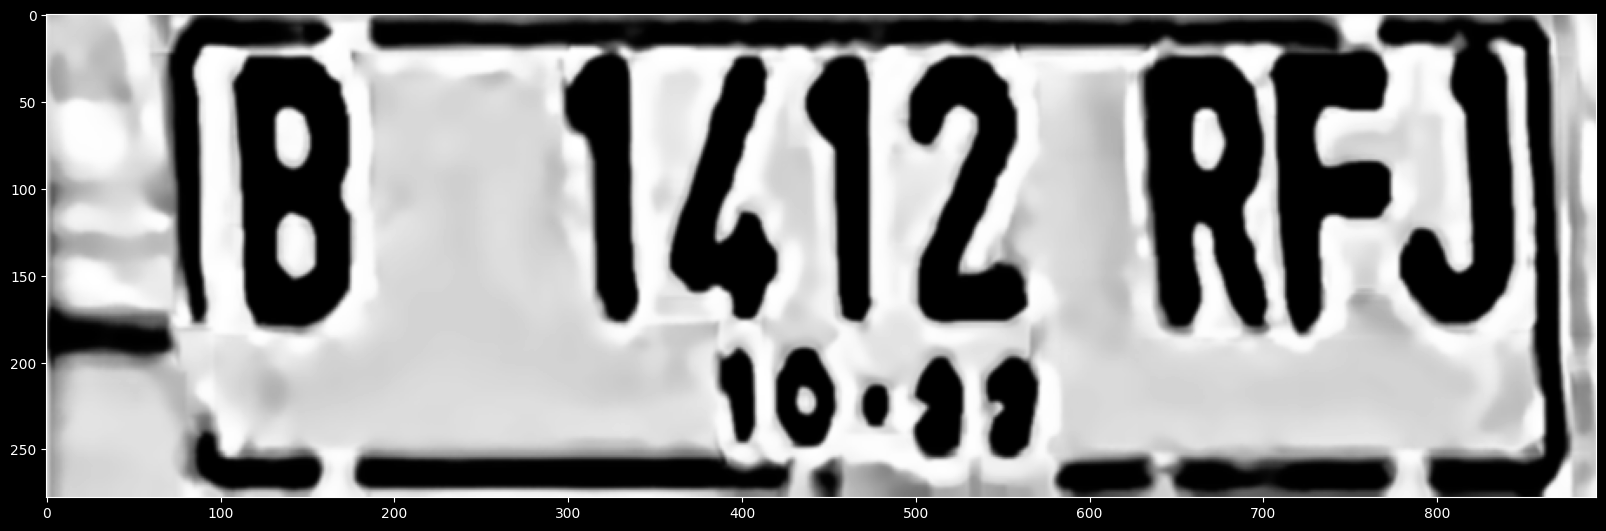

In [113]:
def find_expected_number_plate_color(image):
    # get the height and width of the image
    height, width = image.shape[:2]
    # get the area of the image
    area = height * width
    # get the number of black pixels in the image
    number_of_black_pix = np.sum(image == 0)
    # get the number of white pixels in the image
    number_of_white_pix = np.sum(image == 255)
    # calculate the number of black pixels in the image
    # if the plate is on white background, do nothing
    # if the plate is on black background, invert the image
    if number_of_black_pix < number_of_white_pix:
        print("black")
        image = cv2.bitwise_not(image)
    else:
        print("white")
    return image

test_images = find_expected_number_plate_color(test_images)
plt.figure(figsize=(20,30))
plt.imshow(test_images, cmap='gray')
plt.axis('on')
plt.show()

In [116]:
# save the image based the name of the image (imges variable)
cv2.imwrite("preprocessed/" + imges.split('/')[1], test_images)

True